In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your "images" folder
images_folder_path = '/content/drive/My Drive/images'

# List the files in the "images" folder
ls = []
for dirname, _, filenames in os.walk(images_folder_path):
    for filename in filenames:
        ls.append(os.path.join(dirname, filename))

# Now you can access and work with the files in the "images" folder in your Google Drive
# ls will contain the list of files in the "images" folder


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Necessary Imports
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [22]:
import os

# Define the path to the "images" folder in your Google Drive
images_folder_path = '/content/drive/My Drive/images'

# Walk through the directory and list the number of directories and images
for dirpath, dirnames, filenames in os.walk(images_folder_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '/content/drive/My Drive/images'.
There are 24 directories and 0 images in '/content/drive/My Drive/images/train'.
There are 0 directories and 44 images in '/content/drive/My Drive/images/train/Khajuraho'.
There are 0 directories and 362 images in '/content/drive/My Drive/images/train/qutub_minar'.
There are 0 directories and 206 images in '/content/drive/My Drive/images/train/jamali_kamali_tomb'.
There are 0 directories and 252 images in '/content/drive/My Drive/images/train/iron_pillar'.
There are 0 directories and 159 images in '/content/drive/My Drive/images/train/Sun Temple Konark'.
There are 0 directories and 100 images in '/content/drive/My Drive/images/train/lotus_temple'.
There are 0 directories and 93 images in '/content/drive/My Drive/images/train/mysore_palace'.
There are 0 directories and 187 images in '/content/drive/My Drive/images/train/tajmahal'.
There are 0 directories and 200 images in '/content/drive/My Drive/images/train/vict

In [25]:
# Define your directory paths
original_path = "/content/drive/My Drive"
train_dir = original_path + "/content/drive/My Drive/images/train/"
test_dir = original_path + "/content/drive/My Drive/images/test/"

# Now, train_dir and test_dir contain the complete paths
print("Train Directory:", train_dir)
print("Test Directory:", test_dir)


Train Directory: /content/drive/My Drive/content/drive/My Drive/images/train/
Test Directory: /content/drive/My Drive/content/drive/My Drive/images/test/


In [26]:
import numpy as np
import os

# Define the path to your directory (train_dir in this case)
train_dir = '/content/drive/My Drive/images/train'  # Replace with your actual directory path

# Get all the class names
class_names = np.array(sorted([item.name for item in os.scandir(train_dir) if item.is_dir()]))
class_names


array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [27]:
# function used to view an random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class

  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

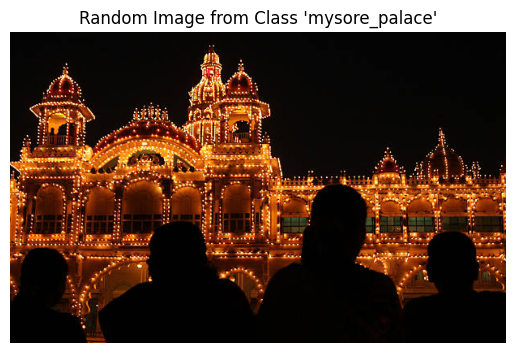

In [42]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define your target directory (train_dir in this case)
train_dir = '/content/drive/My Drive/images/train'  # Replace with your actual directory path
test_dir = "/content/drive/My Drive/images/test"
# Define your list of class names (class_names in this case)
class_names = sorted(os.listdir(train_dir))

# Choose a random class name
random_class = random.choice(class_names)

# Get a random image from the selected class
class_dir = train_dir + '/' + random_class
random_image = random.choice(os.listdir(class_dir))
random_image_path = class_dir + '/' + random_image

# View the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Random Image from Class '{random_class}'")
plt.axis('off')
plt.show()


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(300, 300),
                                             batch_size=32,
                                             class_mode='categorical')


Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [44]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

 # Create our model
 model_1 = Sequential([
   Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
   Conv2D(10, 3, activation='relu'),
   MaxPool2D(),
   Conv2D(10, 3, activation='relu'),
   Conv2D(10, 3, activation='relu'),
   MaxPool2D(),
   Flatten(),
   Dense(24, activation='softmax')
 ])

 # Compile the model
 model_1.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [45]:
 # Fit the model
 history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
115/115 [==============================] - 1187s 10s/step - loss: 3.0271 - accuracy: 0.1536 - val_loss: 2.9149 - val_accuracy: 0.1983
Epoch 2/5
115/115 [==============================] - 53s 465ms/step - loss: 2.0488 - accuracy: 0.4201 - val_loss: 2.7881 - val_accuracy: 0.3441
Epoch 3/5
115/115 [==============================] - 51s 444ms/step - loss: 0.8046 - accuracy: 0.7766 - val_loss: 3.7602 - val_accuracy: 0.4090
Epoch 4/5
115/115 [==============================] - 52s 455ms/step - loss: 0.1644 - accuracy: 0.9615 - val_loss: 5.4776 - val_accuracy: 0.4194
Epoch 5/5
115/115 [==============================] - 50s 434ms/step - loss: 0.0363 - accuracy: 0.9967 - val_loss: 6.2857 - val_accuracy: 0.4194


In [46]:
 model_1.evaluate(test_data)

33/33 [==============================] - 11s 339ms/step - loss: 6.2857 - accuracy: 0.4194


[6.285726070404053, 0.4194470942020416]

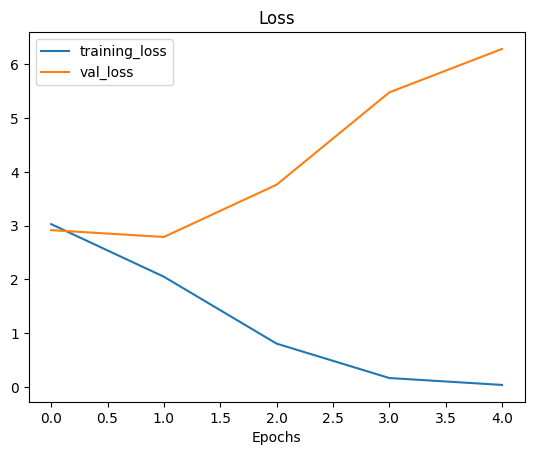

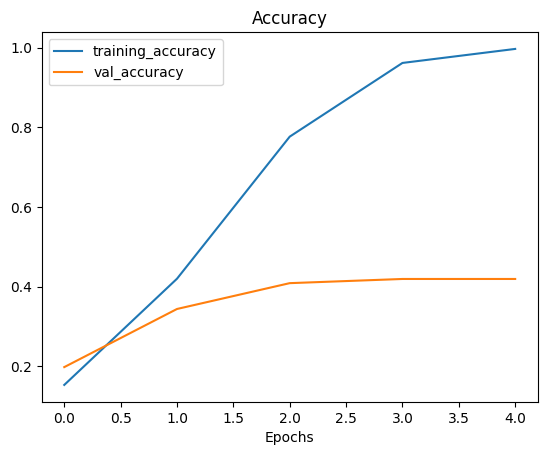

In [47]:
 plot_loss_curves(history_1)

In [48]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

In [49]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
115/115 [==============================] - 51s 429ms/step - loss: 2.8603 - accuracy: 0.2370 - val_loss: 2.7918 - val_accuracy: 0.3232
Epoch 2/5
115/115 [==============================] - 52s 451ms/step - loss: 1.1936 - accuracy: 0.6879 - val_loss: 3.0470 - val_accuracy: 0.4042
Epoch 3/5
115/115 [==============================] - 52s 452ms/step - loss: 0.3735 - accuracy: 0.9168 - val_loss: 4.1444 - val_accuracy: 0.4261
Epoch 4/5
115/115 [==============================] - 51s 445ms/step - loss: 0.1010 - accuracy: 0.9858 - val_loss: 4.4038 - val_accuracy: 0.4128
Epoch 5/5
115/115 [==============================] - 60s 519ms/step - loss: 0.0377 - accuracy: 0.9984 - val_loss: 5.3833 - val_accuracy: 0.3966


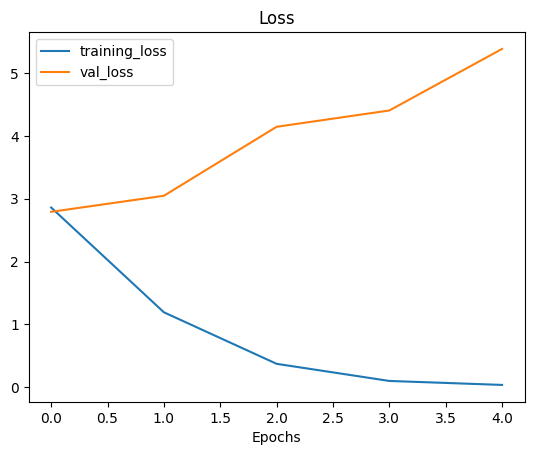

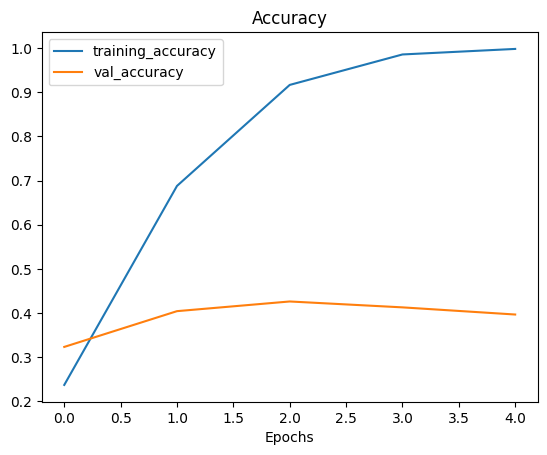

In [50]:
plot_loss_curves(history_10)

In [51]:
 train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=20, # note: this is an int not a float
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

 train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(300, 300),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 3666 images belonging to 24 classes.


In [52]:
 # Clone the model (use the same architecture)
 model_11 = tf.keras.models.clone_model(model_10)

 # Compile the cloned model (same setup as used for model_10)
 model_11.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

 # Fit the model
 history_11 = model_11.fit(train_data_augmented, # use augmented data
                           epochs=5,
                           steps_per_epoch=len(train_data_augmented),
                           validation_data=test_data,
                           validation_steps=len(test_data))

Epoch 1/5
115/115 [==============================] - 127s 1s/step - loss: 3.0517 - accuracy: 0.1432 - val_loss: 3.0845 - val_accuracy: 0.1535
Epoch 2/5
115/115 [==============================] - 124s 1s/step - loss: 2.6468 - accuracy: 0.2207 - val_loss: 3.0533 - val_accuracy: 0.1344
Epoch 3/5
115/115 [==============================] - 126s 1s/step - loss: 2.4801 - accuracy: 0.2752 - val_loss: 3.0859 - val_accuracy: 0.1735
Epoch 4/5
115/115 [==============================] - 136s 1s/step - loss: 2.3866 - accuracy: 0.2932 - val_loss: 3.2611 - val_accuracy: 0.1687
Epoch 5/5
115/115 [==============================] - 127s 1s/step - loss: 2.3084 - accuracy: 0.3118 - val_loss: 3.1562 - val_accuracy: 0.2069


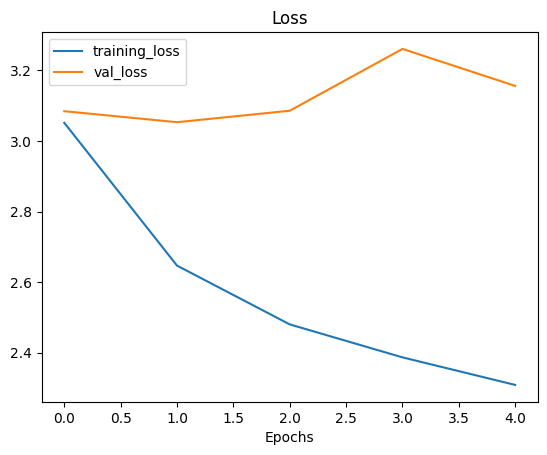

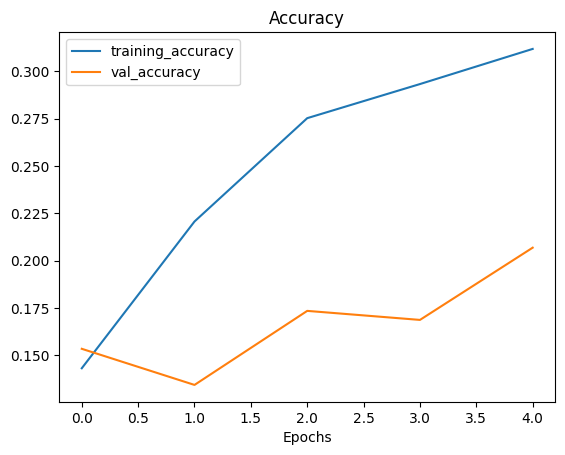

In [53]:
 # Check out our model's performance with augmented data
 plot_loss_curves(history_11)

In [54]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


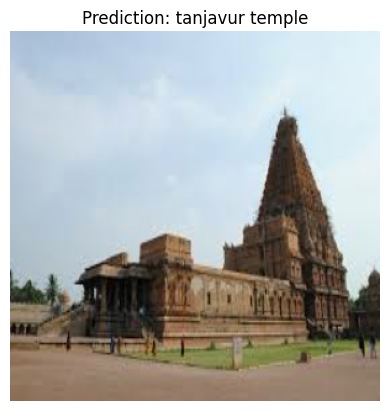

In [61]:
# make a new prediction
pred_and_plot(model_10, "/content/drive/My Drive/images/test/tanjavur temple/20.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


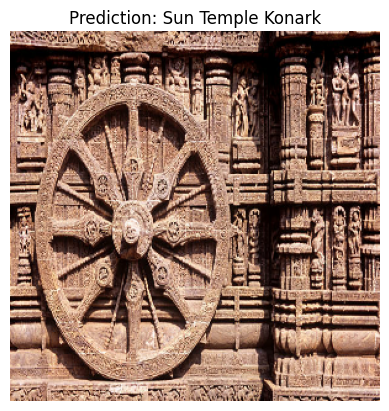

In [63]:
pred_and_plot(model_10, "/content/drive/My Drive/images/test/Sun Temple Konark/19.jpg", class_names)

1/1 [==============================] - 0s 19ms/step


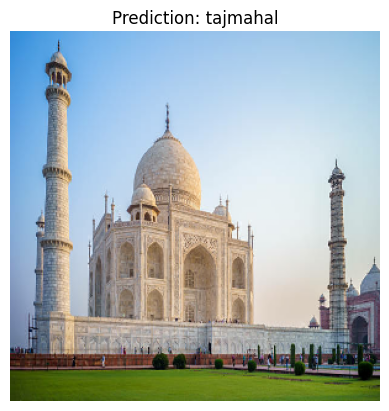

In [64]:
pred_and_plot(model_10, "/content/drive/My Drive/images/test/tajmahal/91.jpg", class_names)

1/1 [==============================] - 0s 19ms/step


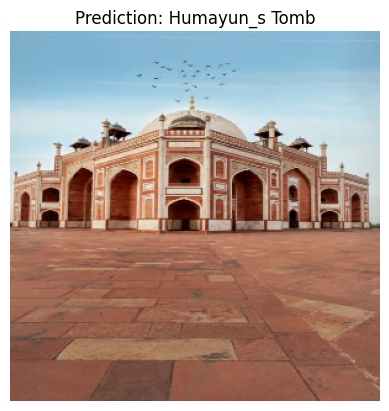

In [65]:
pred_and_plot(model_10, "/content/drive/My Drive/images/test/Humayun_s Tomb/24.jpg", class_names)

In [66]:
# save the model
model_10.save("saved_trained_model")